# Discrete Wavelet Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 1024

k = np.linspace(0, N-1, N)

print(f'Smallest Normalized Frequency = {1/N}')

Smallest Normalized Frequency = 0.0009765625


## Function Definitions

Return Fourier Transform between -0.5 and 0.5

In [4]:
def fft(x_k):
    return np.fft.fftshift(np.fft.fftfreq(len(x_k))), np.fft.fftshift(np.fft.fft(x_k))

Inverse of above function

In [5]:
def ifft(x_f):
    return np.real(np.fft.ifft(np.fft.ifftshift(x_f)))

### Ideal LPF

In [6]:
def lpf(x_k):
    n = len(x_k)
    x_f = np.fft.fftshift(np.fft.fft(x_k))
    x_f[:n//4] = 0
    x_f[-n//4:] = 0
    return np.real(np.fft.ifft(np.fft.ifftshift(x_f)))
    

### Ideal HPF

In [7]:
def hpf(x_k):
    n = len(x_k)
    x_f = np.fft.fftshift(np.fft.fft(x_k))
    x_f[n//4:-n//4] = 0
    return np.real(np.fft.ifft(np.fft.ifftshift(x_f)))

### Energy of a Signal

In [8]:
def energy(x_k):
    return np.sum(np.square(x_k))

## Multi-Tone Signal

In [9]:
x_k = np.random.random(N)
x_k = x_k-np.average(x_k)

print(f'Length of signal = {len(x_k)} samples')

Length of signal = 1024 samples


In [10]:
x_k = np.cos(np.pi/6*k) + np.cos(5*np.pi/6*k) + 0.35*np.cos(np.pi/3*k) + 0.55*np.cos(2*np.pi/3*k)

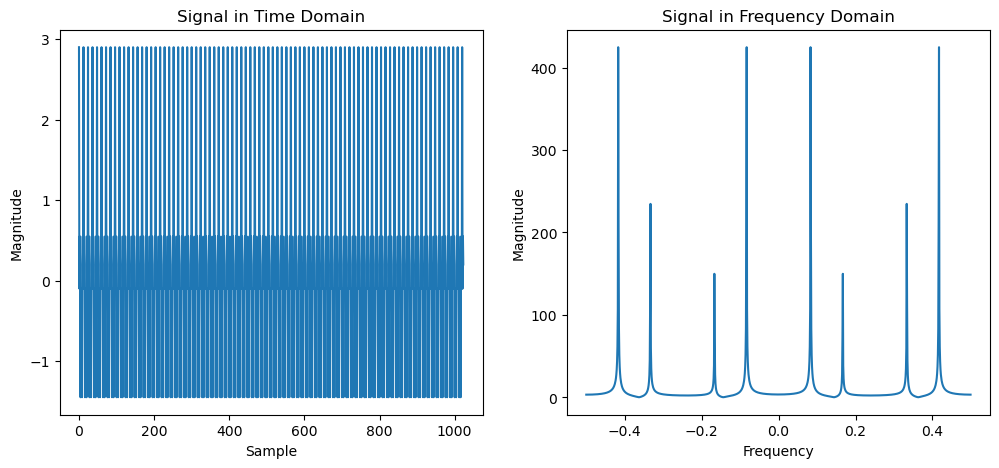

In [11]:
f, x_f = fft(x_k)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k, x_k)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("Signal in Time Domain")

plt.subplot(1,2,2)
plt.plot(f, np.abs(x_f))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Signal in Frequency Domain")

plt.show()

### Reconstructed Signal

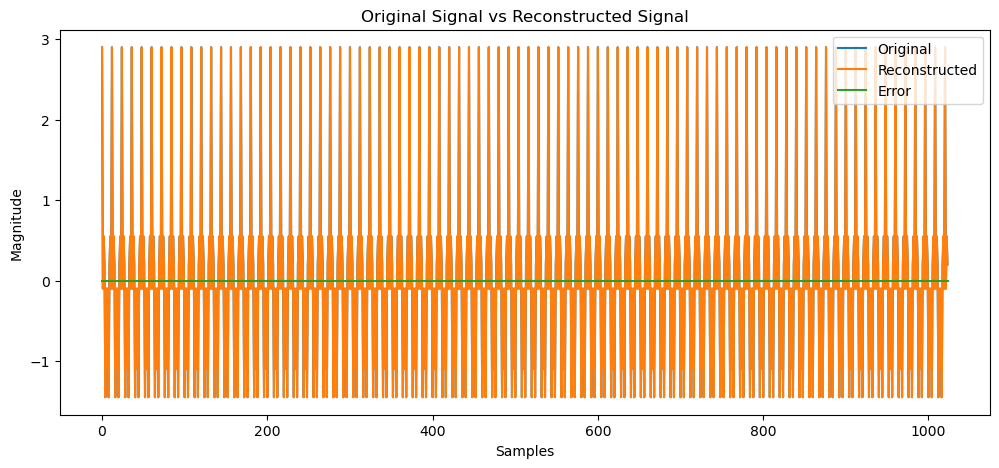

In [12]:
x_r = ifft(x_f)

plt.figure(figsize=(12,5))
plt.plot(k,x_k)
plt.plot(k,x_r)
plt.plot(k, x_r-x_k)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.title("Original Signal vs Reconstructed Signal")
plt.legend(["Original","Reconstructed", "Error"])
plt.show()

## Filtering

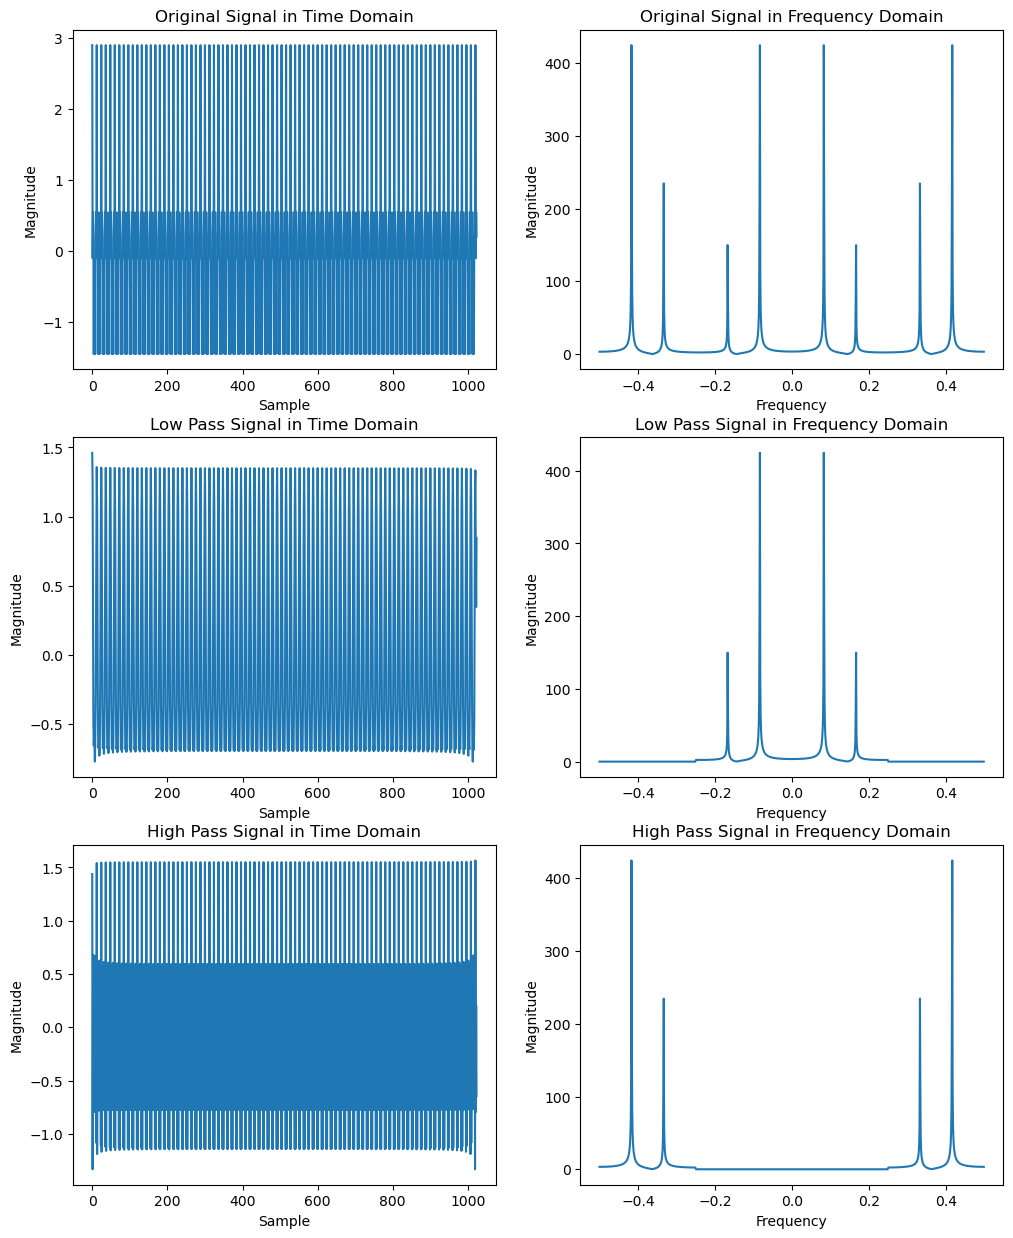

In [13]:
x_k_l = lpf(x_k)
x_k_h = hpf(x_k)


plt.figure(figsize=(12,15))

plt.subplot(3,2,1)
plt.plot(k, x_k)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("Original Signal in Time Domain")

plt.subplot(3,2,2)
plt.plot(f, np.abs(fft(x_k)[1]))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Original Signal in Frequency Domain")

plt.subplot(3,2,3)
plt.plot(k, x_k_l)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("Low Pass Signal in Time Domain")

plt.subplot(3,2,4)
plt.plot(f, np.abs(fft(x_k_l)[1]))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Low Pass Signal in Frequency Domain")

plt.subplot(3,2,5)
plt.plot(k, x_k_h)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("High Pass Signal in Time Domain")

plt.subplot(3,2,6)
plt.plot(f, np.abs(fft(x_k_h)[1]))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("High Pass Signal in Frequency Domain")

plt.show()

### Subsampling

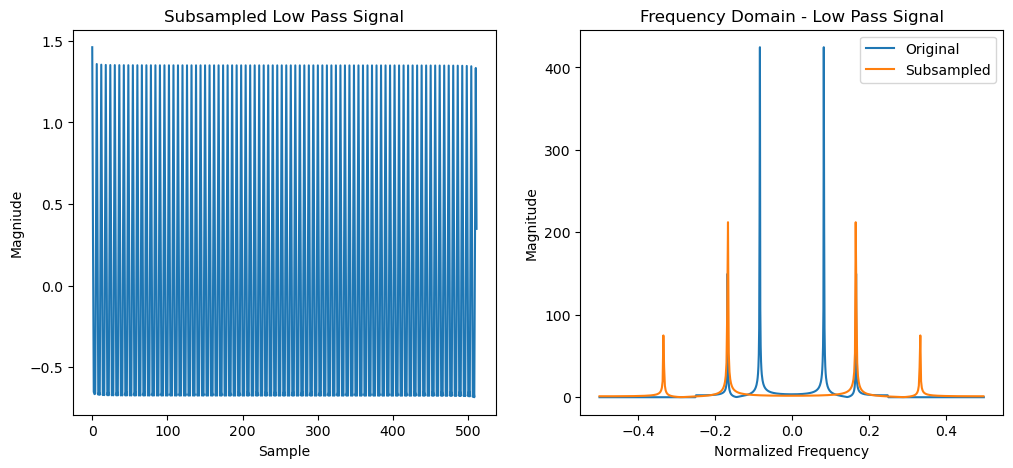

In [14]:
x_k_l_2 = x_k_l[::2]

_,x_f_l = fft(x_k_l)
f2, x_f_l_2 = fft(x_k_l_2)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x_k_l_2)
plt.title("Subsampled Low Pass Signal")
plt.xlabel("Sample")
plt.ylabel("Magniude")

plt.subplot(1,2,2)
plt.plot(f,np.abs(np.abs(x_f_l)))
plt.plot(f2,np.abs(x_f_l_2))
plt.title("Frequency Domain - Low Pass Signal")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude")
plt.legend(["Original", "Subsampled"])
plt.show()

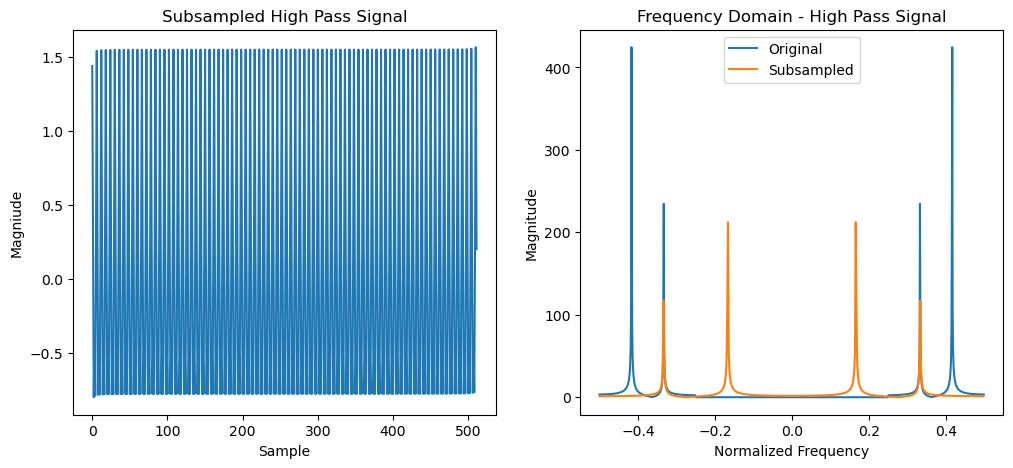

In [15]:
x_k_h_2 = x_k_h[::2]

_,x_f_h = fft(x_k_h)
f2, x_f_h_2 = fft(x_k_h_2)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x_k_h_2)
plt.title("Subsampled High Pass Signal")
plt.xlabel("Sample")
plt.ylabel("Magniude")

plt.subplot(1,2,2)
plt.plot(f,np.abs(np.abs(x_f_h)))
plt.plot(f2,np.abs(x_f_h_2))
plt.title("Frequency Domain - High Pass Signal")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude")
plt.legend(["Original", "Subsampled"])
plt.show()

In [20]:
print(f'Energy of Original Signal = {energy(x_k)}')
print(f'Energy of Low Pass Signal = {energy(x_k_l)}')
print(f'Energy of High Pass Signal = {energy(x_k_h)}')
print(f'Sum of High and Low Signal Energies = = {energy(x_k_h)+energy(x_k_l)}')

Energy of Original Signal = 1245.5124999999996
Energy of Low Pass Signal = 576.8476274227336
Energy of High Pass Signal = 668.6593916202347
Sum of High and Low Signal Energies = = 1245.5070190429683


In [22]:
print(f'Energy of subsampled Low Pass Signal = {energy(x_k_l_2)}')
print(f'Energy of subsampled High Pass Signal = {energy(x_k_h_2)}')

Energy of subsampled Low Pass Signal = 288.42514000531213
Energy of subsampled High Pass Signal = 334.33102210406264


To counteract this, multiply by $\sqrt{2}$

In [23]:
print(f'Energy of scaled subsampled Low Pass Signal = {energy(x_k_l_2*np.sqrt(2))}')
print(f'Energy of scaled subsampled High Pass Signal = {energy(x_k_h_2*np.sqrt(2))}')

Energy of scaled subsampled Low Pass Signal = 576.8502800106243
Energy of scaled subsampled High Pass Signal = 668.6620442081255
